export HEADAS=/Users/brettlv/src_heasoft/heasoft-6.25/x86_64-apple-darwin16.7.0/  
. $HEADAS/headas-init.sh  
source /Users/brettlv/src_heasoft/heasoft-6.25/CALDB/software/tools/caldbinit.sh  



In [ ]:
os.system('export'+' HEADAS=/Users/brettlv/src_heasoft/heasoft-6.25/x86_64-apple-darwin16.7.0/')
os.system('.'+' $HEADAS/headas-init.sh')
os.system('source'+' /Users/brettlv/src_heasoft/heasoft-6.25/CALDB/software/tools/caldbinit.sh')

In [ ]:
python3 pipe0xrtpipeline.py# xrtpipeline only once
python3 remove.py #remove files

python3 pipe1xselectpipeline.py 
#select src/bkg get spectrum and lc 
#<para_xselect.txt >xselext_log.log

python3 pipe2xrtmkarfpipeline.py 
# mkarf 
# <para_arf.txt  >arf_log.log

python3 pipe3grpphapipelineminbin.py
# copy rmf file and group 
#<para_grpphamin%d.txt 


python3 pipe3grpless85.py
# copy rmf file and group 
#<para_grppha.txt 
#> %s/src_min%d.pi


python3 xspecminbin.py  # xspex fit > fit.txt
#<%s/para_xfitmin%d.txt
#>%s/fitmin%d.txt



import os
import shutil
os.remove(path)   #删除文件
os.removedirs(path)   #删除空文件夹
shutil.rmtree(path)    #递归删除文件夹

# set up axis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    #ax.spines['right'].set_color('none')
    #ax.spines['left'].set_color('none')
    #ax.yaxis.set_major_locator(ticker.NullLocator())
    #ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
    
    #ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    #ax.patch.set_alpha(0.9)

# plot_counts_rate

In [3]:
import os
import sys
import getopt
from shutil import copyfile
import pandas as pandas
from dateutil.parser import parse
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
#matplotlib.use('MacOSX')
import pandas as pd

dataxrt=pd.read_excel('/Users/brettlv/Downloads/vla_archival_survey.xlsx',sheet_name='Sheet9')
obsidsortbyexp=[]
for i in dataxrt['obsid']:
    obsidsortbyexp.append('000%d'%i)
obsidssort=obsidsortbyexp[0:26]



def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids



In [3]:
len(dates),len(counts)

NameError: name 'dates' is not defined

## plot

import pandas as pd
plt.plot(dates,counts,'.',label='xrt')
plt.legend()
plt.yscale('log')
plt.title('radius 35arcsec')
plt.show()# radius 70" 142" 260" all

obsids=get_obsids(filepath)
outfile="radius35.npz"
np.savez(outfile, dates,counts,obsids)

In [ ]:
使用re.split()较为方便
re.split(pattern, string, maxsplit=0) #原型
re.split()的使用有两种方式：
re.split("[ !]", text) #[]里边放的是需要的分隔符，中间没有空格和逗号
re.split(",|!", text) #中间用 | 隔开
当是多个单一分隔符时，适合用第一种，第二种需要考虑某些字符需要转义使用
re.split("[;,?]")
re.split(";|,|\?", text)
当多个长短不一的分隔符时，适合第二种
re.split(r";|,|\?\s|;\s|,\s", text) 

--------------------- 
作者：Hot_D 
来源：CSDN 
原文：https://blog.csdn.net/shidamowang/article/details/80254476 
版权声明：本文为博主原创文章，转载请附上博文链接！

re.split(r";|,|\?\s|;\s|,\s", text) 

import pandas as pd

plt.plot(dates,counts,'.',label='xrt')
plt.yscale('log')
plt.title('radius 70arcsec')
plt.legend()
plt.show()# radius 70" 142" 260" all

outfile="radius20.npz"
obsids=get_obsids(filepath)
np.savez(outfile, dates,counts,obsids)
npzfile=np.load("radius20.npz")
npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2']

In [ ]:
import pandas as pd
plt.plot(dates,counts,'.',label='xrt')
plt.legend()
plt.yscale('log')
plt.show()# radius 25" >1000s

# get_xspec

## get_fit_log

In [4]:
# encoding: UTF-8
import re
regex = re.compile('\s+')
# 将正则表达式编译成Pattern对象

filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/'

def get_fit_log(path,obs_id,mincount):
    fit_filepath=path+obs_id+'_xrt/fitmin%d.txt'%mincount
    fit_file_dir=os.path.join(path,obs_id+'_xrt')

    with open(fit_filepath,'r') as f:
        content = f.readlines()
        info=content[-25:]
        for i_,line in enumerate(info):
            #print(i_,":",line)
            if line.find('Ill-formed')>=0: 
                #print("wrong",obs_id)
                return 0
            elif line.find('PhoIndex')>=0:
                #re.split(r";|,|\?\s|;\s|,\s", text) 
                powerlawindex=re.split(r"\s+",line.split("+/-")[0])[-2]
                indexerr=re.split(r"\s+",line.split("+/-")[1])[-2]
                #print(line.split("+/-"))
                #print("plindex: ",powerlawindex,"\nindexerr",indexerr)            
            elif line.find('Test statistic : Chi-Squared')>=0:
                bins=re.split(r"\s+",line.split("using ")[1])[0]
                #print('bins: ',bins)
                if int(bins)<6: 
                    #print('bins <6 ')
                    return 0
                    
            elif line.find('Reduced chi-squared')>=0:              
                rechied=re.split(r"\s+",line.split("for")[0])[-2]
                #print("rechi",rechied) 
                
            elif line.find('Model Flux')>=0:
                flux=line.split("ergs/cm^2/s) ")[0].split('(')[-1]  
                #print('flux: ',flux,'ergs/cm^2/s')
                
            elif line.find('Error range')>=0: 
                fluxrangeleft=line.split("(")[1].split(")")[0].split(" ")[0]
                fluxrangeright=line.split("(")[1].split(")")[0].split(" ")[2]
                #print('fluxleft:',fluxrangeleft)
                #print('fluxright:',fluxrangeright)  
                print('{0:>3},{1:>3},{2:>4},{3:>10},{4:>10},{5:>10},{6:>10},{7:>14}'.format(powerlawindex,indexerr,bins,rechied,flux,fluxrangeleft,fluxrangeright,obs_id))
                return powerlawindex,indexerr,bins,rechied,flux,fluxrangeleft,fluxrangeright,obs_id
              
 
    

In [ ]:
import pandas as pd
import numpy as np
import plotly_express as px

## get obsids

In [6]:
import numpy as np

In [7]:
datamore85=np.loadtxt('%sxspecdatamorethan85.txt'%filepath)
obsidsmore85=[]
for i in datamore85[:,2]:
    obsidsmore85.append('000%d'%i)
dataless85=np.loadtxt('%sxspecdatalessthan85.txt'%filepath)
obsidsless85=[]
for i in dataless85[:,2]:
    obsidsless85.append('000%d'%i)
   

### more 85 fitlog

In [8]:
def get_all_log(path,obsids,mincount):   
    for i in range(0,len(obsids)):
        get_fit_log(path,obsids[i],mincount)

print('{0:>3},{1:>3},{2:>4},{3:>10},{4:>10},{5:>10},{6:>10},{7:>14}'.format('plindex','indexerr','bins','rechied','flux','fluxrangeleft','fluxrangeright','obs_id'))
              
logfiles=get_all_log(filepath,obsidsmore85,mincount=10)        

plindex,indexerr,bins,   rechied,      flux,fluxrangeleft,fluxrangeright,        obs_id
1.92181,5.25573E-02,  95,    0.9570,8.8364e-12 , 8.376e-12, 9.392e-12,   00030955001
1.98472,4.98155E-02, 103,    1.0284,7.3349e-12 , 6.853e-12, 7.753e-12,   00030955002
1.95257,4.49852E-02, 128,   0.90176,8.5321e-12 , 7.975e-12, 9.092e-12,   00030955003
1.91460,3.41111E-02, 185,   0.92019,1.1048e-11 , 1.064e-11, 1.151e-11,   00035166001
1.78246,4.21717E-02, 138,    1.0147,9.3293e-12 , 8.894e-12, 9.755e-12,   00035776001
1.44149,0.258049,   8,      1.13,2.4478e-12 , 1.877e-12, 3.694e-12,   00035776006
1.94941,0.242180,   7,     0.650,1.791e-12 , 1.309e-12, 2.150e-12,   00035776007
1.44693,0.110132,  26,     1.112,7.2958e-12 , 6.487e-12, 8.334e-12,   00049654002
1.47261,0.293637,   7,     0.852,1.6556e-12 , 1.351e-12, 2.336e-12,   00049654004
1.75090,0.149375,  18,    0.7352,1.4852e-12 , 1.273e-12, 1.749e-12,   00080898001
1.48634,0.145265,  16,    0.8277,2.0118e-12 , 1.659e-12, 2.309e-12,   00080898

### less85 fitlog

In [9]:
logfiles=get_all_log(filepath,obsidsless85,mincount=1)  

2.09374,0.290116,  39,    0.8372,9.0856e-13 , 5.906e-13, 1.322e-12,   00035776002
1.55219,0.268242,  34,    3.4910,1.4318e-12 , 9.443e-13, 1.907e-12,   00035776003
1.47861,0.217306,  48,     1.186,2.0811e-12 , 1.649e-12, 2.656e-12,   00035776004
1.66221,0.221918,  49,     1.211,1.5246e-12 , 1.321e-12, 2.129e-12,   00035776005
1.96505,0.252630,  41,    0.9942,1.757e-12 , 1.221e-12, 2.399e-12,   00035776008
1.45751,0.315916,  44,    0.4379,2.2316e-12 , 1.512e-12, 3.384e-12,   00035776010
1.35048,0.229157,  45,    0.7534,2.1969e-12 , 1.698e-12, 3.195e-12,   00035776011
2.16213,0.471816,  15,     1.214,1.4662e-12 , 8.406e-13, 2.603e-12,   00035776012
1.41130,0.191328,  60,    0.7105,2.6049e-12 , 2.063e-12, 3.237e-12,   00035776014
1.61463,0.293360,  31,    0.7624,2.9075e-12 , 1.875e-12, 3.950e-12,   00035776015
1.21632,0.198632,  55,    0.8879,3.5151e-12 , 2.597e-12, 4.277e-12,   00035776016
1.52258,0.229014,  42,    0.8768,1.7963e-12 , 1.287e-12, 2.261e-12,   00035776017
1.76055,0.200152,

In [10]:
filepath

'/Volumes/Brettlv_G_m/Mrk1018/swift/'

In [432]:
cat /Volumes/Brettlv_G_m/Mrk1018/swift/xspecdatamorethan85.txt

0.449 1491  00030955001   3322.1925133689842
0.442 1565  00030955002   3537.5226039783
0.486 2008  00030955003   4129.138391939132
0.632 3301  00035166001   5223.101265822785
0.428 2070  00035776001   4831.9327731092435
0.070 96    00035776006   1371.487349457834
0.091 87    00035776007   957.7911354779047
0.227 306   00049654002   1346.2384513858337
0.041 89    00049654004   2146.233240088743
0.058 219   00080898001   3758.4307264583226
0.062 191   00080898002   3081.49008599132
0.069 136   00088207001   1968.2190512026395
0.069 118   00088207002   1714.991643049197
0.074 152   00088207003   2048.4623055982315

## get fitdata

In [4]:
import pandas as pd
import numpy as np
fitmore85=np.loadtxt('%sxspecfitdatamorethan85.txt'%filepath,delimiter=',')
fitless85=np.loadtxt('%sxspecfitdatalessthan85.txt'%filepath,delimiter=',')

NameError: name 'filepath' is not defined

## Index vs flux

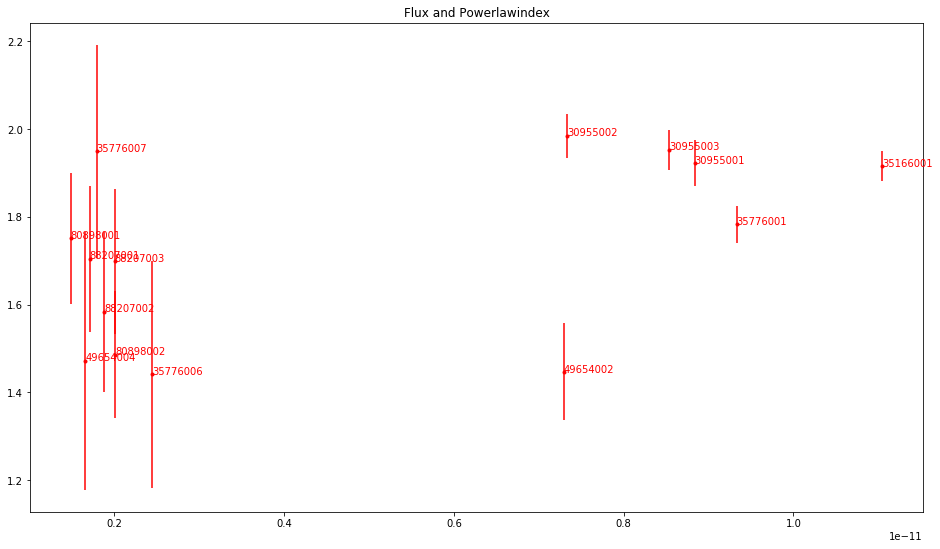

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
x=fitmore85[:,4]
y=fitmore85[:,0]
z=fitmore85[:,7]
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.errorbar(fitmore85[:,4],fitmore85[:,0],yerr=fitmore85[:,1],fmt='.r')
plt.title("Flux and Powerlawindex")
for i,(_x,_y) in enumerate(zip(x,y)):
    plt.text(_x,_y,int(z[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')
plt.show()

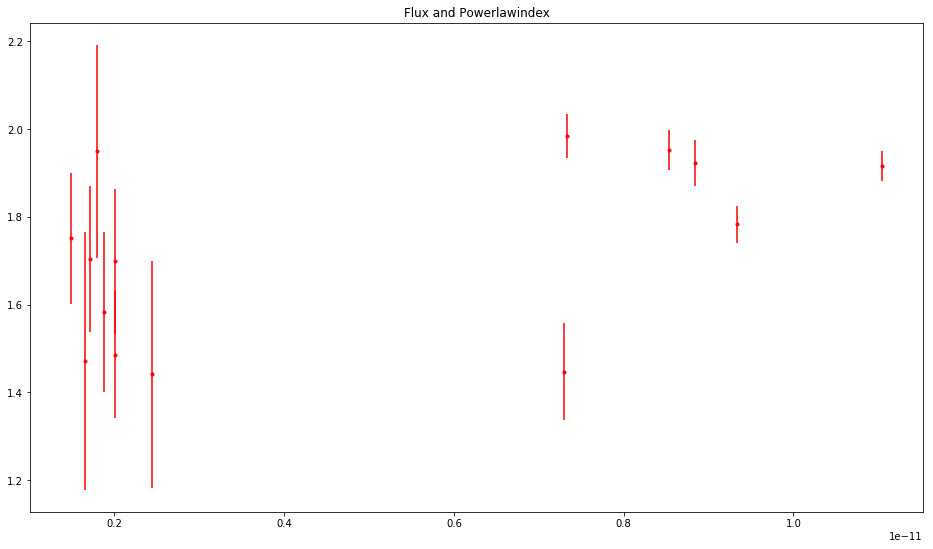

In [441]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.errorbar(fitmore85[:,4],fitmore85[:,0],yerr=fitmore85[:,1],fmt='.r')
plt.title("Flux and Powerlawindex")
plt.show()

## vlatime

In [13]:
dfvla = pd.read_csv ("Mrkvla.csv" , encoding = "utf-8")

In [14]:
dfvlatime=pd.to_datetime(dfvla['vlatime'])

In [15]:
len(dfvlatime)

93

## plot_countrate_fornewids 

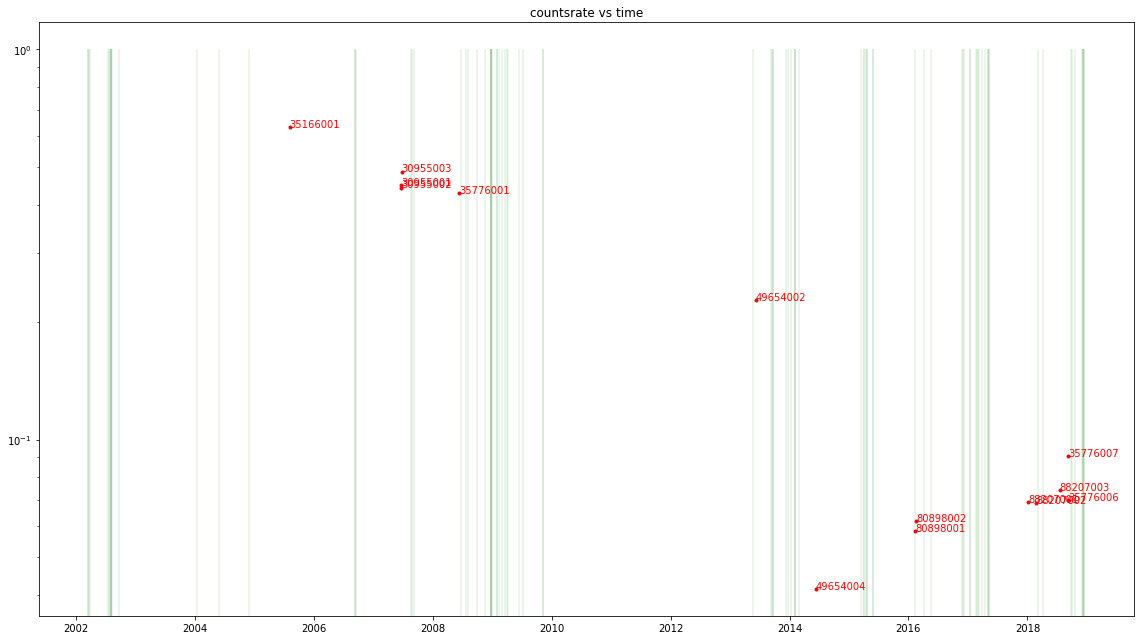

In [34]:
def plot_count_fornewids(filepath,newobsids):
    dates=[]
    countrates=[]
    countsall=[]
    for i in range(0,len(newobsids)):
        date,countrate,counts=get_xselect_log(filepath,newobsids[i])
        date=parse(date)
        dates.append(date)
        countrates.append(countrate)
        countsall.append(counts)
    #print(dates)
    #print(counts)
    return dates,countrates,countsall
#return dates,counts
obsidsnew000=[]
newobsids=fitmore85[:,7]
for i in newobsids:
    obsidsnew000.append('000%d'%i)  

filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
dates,countrates,countsall=plot_count_fornewids(filepath,obsidsnew000)

dates=np.array(dates)
countrates=np.array(countrates)
countsall=np.array(countsall)


obsids=get_obsids(filepath)

countsnew=[]
for i in countrates:
    countsnew.append(float(i))

fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.plot(dates,countsnew,'.r')
plt.vlines(dfvlatime,ymin=0,ymax=1,colors='g',alpha='0.1')

for i,(_x,_y) in enumerate(zip(dates,countsnew)):
    plt.text(_x,_y,int(newobsids[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')

plt.yscale('log')
plt.title("countsrate vs time")
plt.tight_layout()
plt.show() 

In [35]:
dates

array([datetime.datetime(2007, 6, 20, 7, 31, 59),
       datetime.datetime(2007, 6, 22, 20, 8, 46),
       datetime.datetime(2007, 6, 24, 17, 11, 4),
       datetime.datetime(2005, 8, 5, 8, 17, 4),
       datetime.datetime(2008, 6, 11, 3, 57, 43),
       datetime.datetime(2018, 9, 7, 11, 56, 58),
       datetime.datetime(2018, 9, 8, 21, 23, 54),
       datetime.datetime(2013, 6, 7, 2, 14),
       datetime.datetime(2014, 6, 9, 16, 34, 12),
       datetime.datetime(2016, 2, 11, 0, 32, 10),
       datetime.datetime(2016, 2, 16, 0, 11, 28),
       datetime.datetime(2018, 1, 6, 12, 53, 26),
       datetime.datetime(2018, 2, 24, 13, 20, 56),
       datetime.datetime(2018, 7, 17, 21, 8, 31)], dtype=object)

In [443]:
print('{:<3}'.format('num'),'{:<13}'.format('time'),'{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'))
for i_,(x_,y_,z_,h_) in enumerate(zip(dates,countrates,countsall,obsidsnew000)):
    print('{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_),float(z_)/float(y_))

num time          countrate  counts obsid        
0.449 1491  00030955001   3322.1925133689842
0.442 1565  00030955002   3537.5226039783
0.486 2008  00030955003   4129.138391939132
0.632 3301  00035166001   5223.101265822785
0.428 2070  00035776001   4831.9327731092435
0.070 96    00035776006   1371.487349457834
0.091 87    00035776007   957.7911354779047
0.227 306   00049654002   1346.2384513858337
0.041 89    00049654004   2146.233240088743
0.058 219   00080898001   3758.4307264583226
0.062 191   00080898002   3081.49008599132
0.069 136   00088207001   1968.2190512026395
0.069 118   00088207002   1714.991643049197
0.074 152   00088207003   2048.4623055982315


In [36]:
head = ["xrttime" , "obsids" , "countrates"]
l = [dates,obsidsnew000,countrates]
df = pd.DataFrame(l , index = head).T
df.to_csv("Mrkxrtmore85.csv" , encoding = "utf-8")

In [37]:
dfxrt= pd.read_csv ("Mrkxrtmore85.csv" , encoding = "utf-8")

In [38]:
dfxrt

,Unnamed: 0,xrttime,obsids,countrates
0,0,2007-06-20 07:31:59,30955001,0.448800
1,1,2007-06-22 20:08:46,30955002,0.442400
2,2,2007-06-24 17:11:04,30955003,0.486300
3,3,2005-08-05 08:17:04,35166001,0.632000
4,4,2008-06-11 03:57:43,35776001,0.428400
5,5,2018-09-07 11:56:58,35776006,0.069997
6,6,2018-09-08 21:23:54,35776007,0.090834
7,7,2013-06-07 02:14:00,49654002,0.227300
8,8,2014-06-09 16:34:12,49654004,0.041468
9,9,2016-02-11 00:32:10,80898001,0.058269


In [26]:
print('{:<3}'.format('num'),'{:<13}'.format('time'),'{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'))
for i_,(x_,y_,z_,h_) in enumerate(zip(dates,countrates,countsall,obsidsnew000)):
    print('{:<3}'.format(i_),x_,'{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_))

num time          countrate  counts obsid        
0   2007-06-20 07:31:59 0.449 1491  00030955001  
1   2007-06-22 20:08:46 0.442 1565  00030955002  
2   2007-06-24 17:11:04 0.486 2008  00030955003  
3   2005-08-05 08:17:04 0.632 3301  00035166001  
4   2008-06-11 03:57:43 0.428 2070  00035776001  
5   2018-09-07 11:56:58 0.070 96    00035776006  
6   2018-09-08 21:23:54 0.091 87    00035776007  
7   2013-06-07 02:14:00 0.227 306   00049654002  
8   2014-06-09 16:34:12 0.041 89    00049654004  
9   2016-02-11 00:32:10 0.058 219   00080898001  
10  2016-02-16 00:11:28 0.062 191   00080898002  
11  2018-01-06 12:53:26 0.069 136   00088207001  
12  2018-02-24 13:20:56 0.069 118   00088207002  
13  2018-07-17 21:08:31 0.074 152   00088207003  


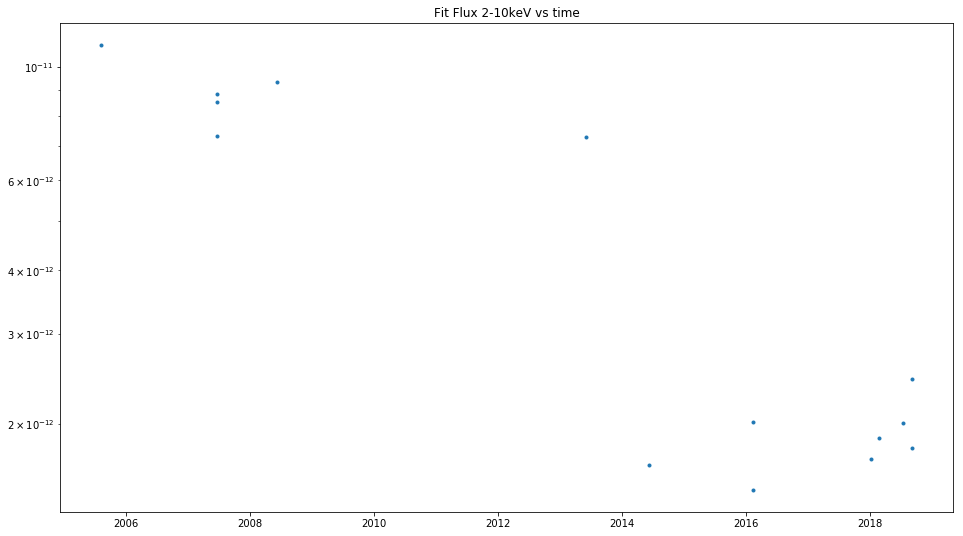

In [445]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.plot(dates,fitmore85[:,4],'.')
plt.title("Fit Flux 2-10keV vs time")
plt.yscale('log')
plt.show()

## fitflux >85

In [1]:
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)

for i,(_x,_y) in enumerate(zip(dates,fitmore85[:,4])):
    plt.text(_x,_y,int(newobsids[i]),color='red',fontsize=10)
    
plt.plot(dates,data[:,4],'.')
plt.title("Fit Flux 2-10keV vs time")
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

## get_xselect_log

In [18]:
def get_xselect_log(path,obs_id):
    xselect_filepath=path+obs_id+'_xrt/xselext_log.log'
    xse_file_dir=os.path.join(path,obs_id+'_xrt')
    date=[]
    countsrateline=[]
    counts=[]
    with open(xselect_filepath,'r') as f:
        content = f.readlines()
        for i in content:
            if i.find('%s'%obs_id)>=0:
                date.append(i)
            elif i.find('counts/sec')>=0:
                countsrateline.append(i)
                    #print(date[2].split(' ')[-2])
    countsstring=countsrateline[0].split(' ')
    #print(obs_id,countsstring)
    for i_,cr in enumerate(countsstring):
        if cr=='for':
            countrate=countsstring[i_+1]
            counts=countsstring[i_-2]
            
    return date[2].split(' ')[-2],countrate,counts
                                                           

get_xselect_log(filepath,obsids[0])

In [447]:
## For counts>80
print('{:<3}'.format('num'),'{:<13}'.format('time'),'{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'))
for i_,(x_,y_,z_,h_) in enumerate(zip(dates,countrates,countsall,obsidsnew000)):
    print('{:<3}'.format(i_),x_,'{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_),float(z_)/float(y_))

num time          countrate  counts obsid        
0   2007-06-20 07:31:59 0.449 1491  00030955001   3322.1925133689842
1   2007-06-22 20:08:46 0.442 1565  00030955002   3537.5226039783
2   2007-06-24 17:11:04 0.486 2008  00030955003   4129.138391939132
3   2005-08-05 08:17:04 0.632 3301  00035166001   5223.101265822785
4   2008-06-11 03:57:43 0.428 2070  00035776001   4831.9327731092435
5   2018-09-07 11:56:58 0.070 96    00035776006   1371.487349457834
6   2018-09-08 21:23:54 0.091 87    00035776007   957.7911354779047
7   2013-06-07 02:14:00 0.227 306   00049654002   1346.2384513858337
8   2014-06-09 16:34:12 0.041 89    00049654004   2146.233240088743
9   2016-02-11 00:32:10 0.058 219   00080898001   3758.4307264583226
10  2016-02-16 00:11:28 0.062 191   00080898002   3081.49008599132
11  2018-01-06 12:53:26 0.069 136   00088207001   1968.2190512026395
12  2018-02-24 13:20:56 0.069 118   00088207002   1714.991643049197
13  2018-07-17 21:08:31 0.074 152   00088207003   2048.462305598

## get_countrate_all

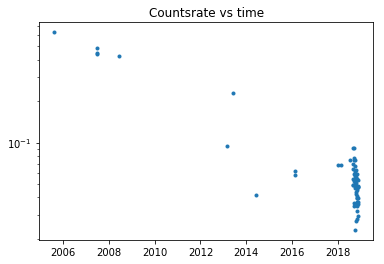

In [39]:
def plot_count(filepath):#all
    obsids=get_obsids(filepath)
    dates=[]
    countrates=[]
    countsall=[]
    for i in range(0,len(obsids)):
        date,countrate,count=get_xselect_log(filepath,obsids[i])
        date=parse(date)
        dates.append(date)
        countrates.append(countrate)
        countsall.append(count)
    #print(dates)
    #print(counts)
    return dates,countrates,countsall

#return dates,counts
filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
dates,countrates,countsall=plot_count(filepath) 

countsnew=[]
for i in countrates:
    countsnew.append(float(i))
plt.plot(dates,countsnew,'.')
plt.yscale('log')
plt.title("Countsrate vs time")
plt.show()

In [40]:
head = ["xrttime" , "obsids" , "countrates"]
l = [dates,obsids,countrates]
df = pd.DataFrame(l , index = head).T
df.to_csv("Mrkxrtall.csv" , encoding = "utf-8")

In [43]:
dfxrtall= pd.read_csv ("Mrkxrtall.csv" , encoding = "utf-8")

In [45]:
dfxrtall

,Unnamed: 0,xrttime,obsids,countrates
0,0,2007-06-20 07:31:59,30955001,0.448800
1,1,2007-06-22 20:08:46,30955002,0.442400
2,2,2007-06-24 17:11:04,30955003,0.486300
3,3,2005-08-05 08:17:04,35166001,0.632000
4,4,2008-06-11 03:57:43,35776001,0.428400
5,5,2018-09-01 18:47:04,35776002,0.049591
6,6,2018-09-02 07:32:41,35776003,0.049468
7,7,2018-09-03 23:23:23,35776004,0.064621
8,8,2018-09-04 00:58:40,35776005,0.054141
9,9,2018-09-07 11:56:58,35776006,0.069997


In [32]:
print('{:<3}'.format('num'),'{:<13}'.format('time'),'{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'))
for i_,(x_,y_,z_,h_) in enumerate(zip(dates,countrates,countsall,obsids)):
    print('{:<3}'.format(i_),x_,'{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_),float(z_)/float(y_))

num time          countrate  counts obsid        
0   2007-06-20 07:31:59 0.449 1491  00030955001   3322.1925133689842
1   2007-06-22 20:08:46 0.442 1565  00030955002   3537.5226039783
2   2007-06-24 17:11:04 0.486 2008  00030955003   4129.138391939132
3   2005-08-05 08:17:04 0.632 3301  00035166001   5223.101265822785
4   2008-06-11 03:57:43 0.428 2070  00035776001   4831.9327731092435
5   2018-09-01 18:47:04 0.050 47    00035776002   947.7526164021697
6   2018-09-02 07:32:41 0.049 48    00035776003   970.3242500202151
7   2018-09-03 23:23:23 0.065 64    00035776004   990.3901208585445
8   2018-09-04 00:58:40 0.054 60    00035776005   1108.2174322602093
9   2018-09-07 11:56:58 0.070 96    00035776006   1371.487349457834
10  2018-09-08 21:23:54 0.091 87    00035776007   957.7911354779047
11  2018-09-09 05:24:49 0.092 50    00035776008   544.0814816426908
12  2018-09-13 14:31:55 0.052 50    00035776010   957.7810129491993
13  2018-09-14 22:21:58 0.059 56    00035776011   955.28906023438

In [450]:
print('{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'),'{:<10}'.format('exptime'))
for i_,(y_,z_,h_) in enumerate(zip(countrates,countsall,obsids)):
    if float(z_)> 85:
        print('{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_),float(z_)/float(y_))

countrate  counts obsid         exptime   
0.449 1491  00030955001   3322.1925133689842
0.442 1565  00030955002   3537.5226039783
0.486 2008  00030955003   4129.138391939132
0.632 3301  00035166001   5223.101265822785
0.428 2070  00035776001   4831.9327731092435
0.070 96    00035776006   1371.487349457834
0.091 87    00035776007   957.7911354779047
0.227 306   00049654002   1346.2384513858337
0.041 89    00049654004   2146.233240088743
0.058 219   00080898001   3758.4307264583226
0.062 191   00080898002   3081.49008599132
0.069 136   00088207001   1968.2190512026395
0.069 118   00088207002   1714.991643049197
0.074 152   00088207003   2048.4623055982315


In [305]:
print('{:<10}'.format('countrate'),'{:<5}'.format('counts'),'{:<13}'.format('obsid'),'{:<10}'.format('exptime'))
for i_,(y_,z_,h_) in enumerate(zip(countrates,countsall,obsids)):
    if float(z_)< 85:
        print('{:.3f}'.format(float(y_)),'{:<5}'.format(z_),'{:<13}'.format(h_),float(z_)/float(y_))

countrate  counts obsid         exptime   
0.050 47    00035776002   947.7526164021697
0.049 48    00035776003   970.3242500202151
0.065 64    00035776004   990.3901208585445
0.054 60    00035776005   1108.2174322602093
0.092 50    00035776008   544.0814816426908
0.052 50    00035776010   957.7810129491993
0.059 56    00035776011   955.289060234387
0.035 18    00035776012   516.4992826398852
0.077 75    00035776014   967.8168632410252
0.037 36    00035776015   985.3565074586014
0.075 63    00035776016   837.4430073508886
0.054 52    00035776017   967.8199854827002
0.068 65    00035776018   962.8060612344655
0.050 47    00035776019   945.2556212541732
0.047 50    00035776020   1065.5982268445505
0.049 46    00035776021   932.7223326168944
0.060 53    00035776023   880.0624346180031
0.062 56    00035776024   902.6289066907368
0.023 22    00035776025   947.7447981734373
0.074 56    00035776026   754.6966389046117
0.057 54    00035776027   945.2457638986136
0.063 67    00035776029   1058.0

## countrate_from_fit_log_all

In [457]:
def get_xfit_log(path,obs_id):
    xfit_filepath=path+obs_id+'_xrt/fit.txt'
    xse_file_dir=os.path.join(path,obs_id+'_xrt')                            
    netcount=[]
    netcountrate=[]
    with open(xfit_filepath,'r') as f:
        content = f.readlines()
        for i in content:
            if i.find('Net count rate')>=0:
                netcount.append(re.split(r"\s+|\s",i.split('+/-')[0])[-2])  
    print(obs_id,netcount[0]) 
    return netcount    

In [458]:
for i in range(0,len(obsids)):
    get_xfit_log(filepath,obsids[i])

00030955001 4.494e-01
00030955002 4.428e-01
00030955003 4.870e-01
00035166001 6.333e-01
00035776001 4.292e-01
00035776002 4.865e-02
00035776003 4.904e-02
00035776004 6.422e-02
00035776005 5.326e-02
00035776006 6.963e-02
00035776007 9.018e-02
00035776008 9.081e-02
00035776010 5.139e-02
00035776011 5.778e-02
00035776012 3.390e-02
00035776014 7.626e-02
00035776015 3.577e-02
00035776016 7.441e-02
00035776017 5.303e-02
00035776018 6.725e-02
00035776019 4.923e-02
00035776020 4.632e-02
00035776021 4.876e-02
00035776023 5.935e-02
00035776024 6.115e-02
00035776025 2.252e-02
00035776026 7.339e-02
00035776027 5.602e-02
00035776029 6.273e-02
00035776031 2.643e-02
00035776032 4.319e-02
00035776033 4.979e-02
00035776034 5.603e-02
00035776035 4.660e-02
00035776036 4.183e-02
00035776037 2.674e-02
00035776038 3.210e-02
00035776039 3.393e-02
00035776040 3.931e-02
00035776041 3.914e-02
00035776042 5.877e-02
00035776043 3.550e-02
00035776044 3.991e-02
00035776045 3.047e-02
00035776046 3.613e-02
0003577604

## plot_less85_countrate

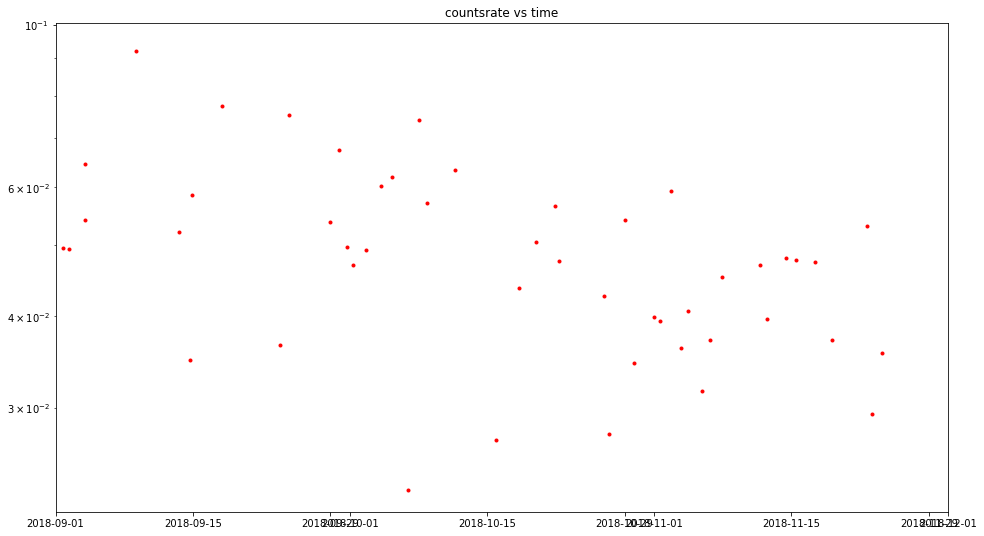

In [52]:
import datetime


filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
dates,countrates,countsall=plot_count_fornewids(filepath,obsidsless85)

dates=np.array(dates)
countrates=np.array(countrates)
countsall=np.array(countsall)
obsids=get_obsids(filepath)

countsnew=[]
for i in countrates:
    countsnew.append(float(i))

fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.plot(dates,countsnew,'.r')
#for i,(_x,_y) in enumerate(zip(dates,countsnew)):
#    plt.text(_x,_y,int(obsidsless85[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')
#setup(ax)
#plt.ylim(0,0.09)
plt.yscale('log')
plt.title("countsrate vs time")
plt.xlim(datetime.datetime(2018, 9, 1),datetime.datetime(2018, 12, 1))
plt.show() 

In [54]:
len(obsidsless85)

49

In [55]:
head = ["xrttime" , "obsids" , "countrates"]
l = [dates,obsidsless85,countsnew]
df = pd.DataFrame(l , index = head).T
df.to_csv("Mrkxrtless85.csv" , encoding = "utf-8")

## all index vs flux

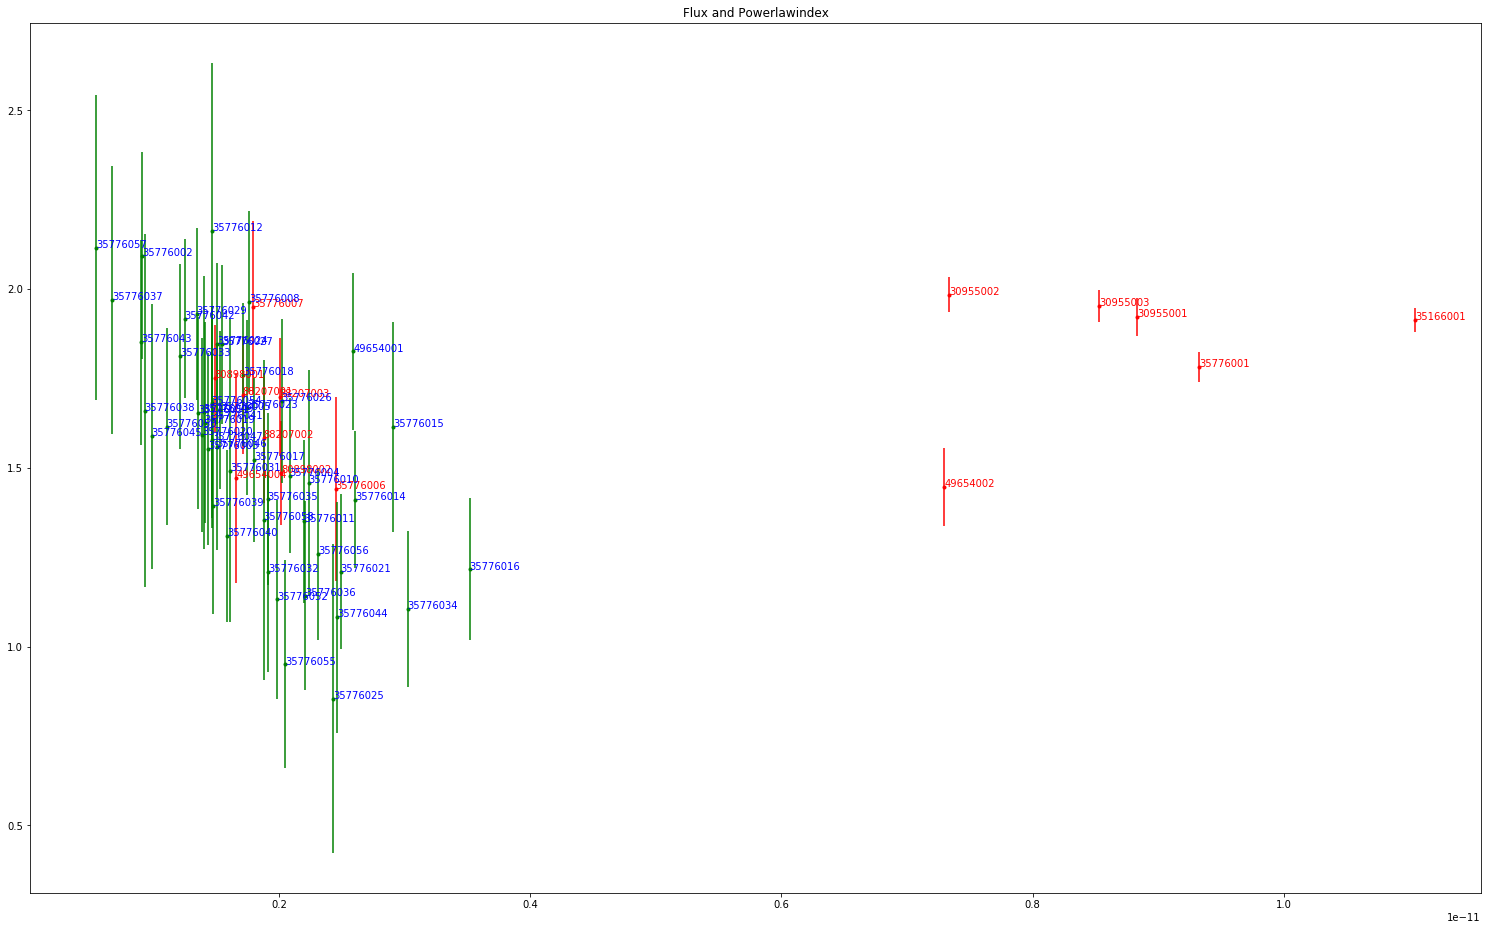

In [464]:
x=fitmore85[:,4]
y=fitmore85[:,0]
z=fitmore85[:,7]
fig=plt.figure(figsize=(26,16))
ax=plt.subplot(111)
plt.errorbar(fitmore85[:,4],fitmore85[:,0],yerr=fitmore85[:,1],fmt='.r')
plt.title("Flux and Powerlawindex")
for i,(_x,_y) in enumerate(zip(x,y)):
    plt.text(_x,_y,int(z[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')

x1=fitless85[:,4]
y1=fitless85[:,0]
z1=fitless85[:,7]


plt.errorbar(fitless85[:,4],fitless85[:,0],yerr=fitless85[:,1],fmt='.g')
for i,(_x,_y) in enumerate(zip(x1,y1)):
    plt.text(_x,_y,int(z1[i]),color='b',fontsize=10)
plt.tight_layout()    
plt.show()

In [386]:
z1.size,z.size

(14, 49)

## all flux

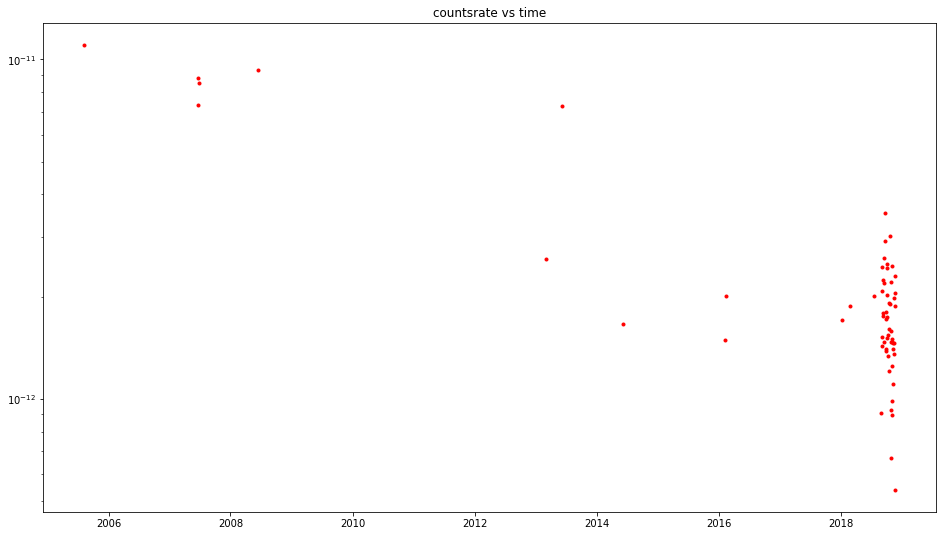

In [461]:
filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
datesless85,countrates,countsall=plot_count_fornewids(filepath,obsidsless85)
datesless85=np.array(datesless85)

filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
datesmore85,countrates,countsall=plot_count_fornewids(filepath,obsidsmore85)
datesmore85=np.array(datesmore85)


fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
#plt.plot(dates,countsnew,'.r')

plt.plot(datesless85,fitless85[:,4],'.r')
plt.plot(datesmore85,fitmore85[:,4],'.r')

#plt.figtext(0,0,'Fig words',color='green',ha='center')

plt.yscale('log')
plt.title("countsrate vs time")
#plt.xlim(datetime.datetime(2018, 1, 1),datetime.datetime(2020, 1, 1))
plt.show() 

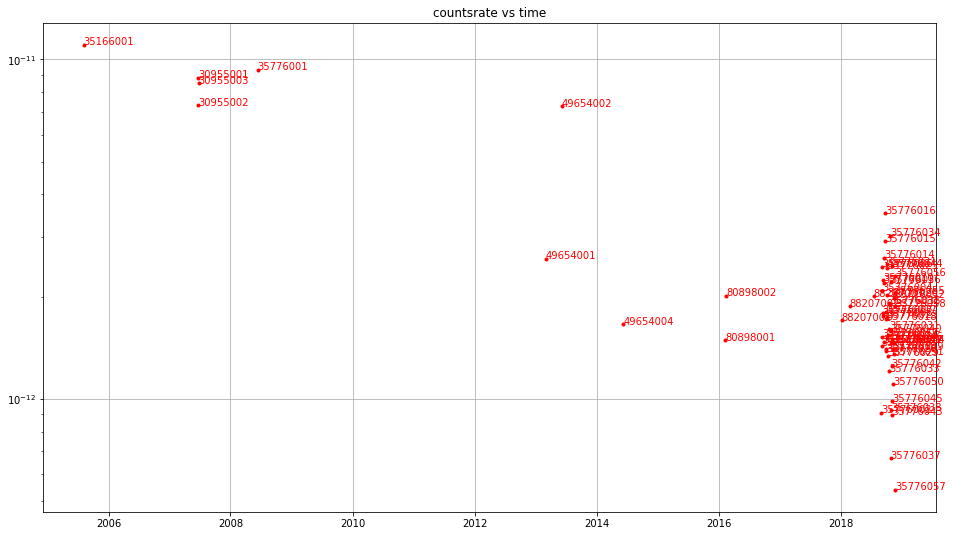

In [463]:
filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
datesless85,countrates,countsall=plot_count_fornewids(filepath,obsidsless85)
datesless85=np.array(datesless85)

filepath='/Volumes/Brettlv_G_m/Mrk1018/swift/' 
datesmore85,countrates,countsall=plot_count_fornewids(filepath,obsidsmore85)
datesmore85=np.array(datesmore85)


fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
#plt.plot(dates,countsnew,'.r')

plt.plot(datesless85,fitless85[:,4],'.r')
plt.plot(datesmore85,fitmore85[:,4],'.r')



for i,(_x,_y) in enumerate(zip(datesless85,x1)):
    
    plt.text(_x,_y,int(z1[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')

for i,(_x,_y) in enumerate(zip(datesmore85,x)):
    plt.text(_x,_y,int(z[i]),color='red',fontsize=10)

#plt.figtext(0,0,'Fig words',color='green',ha='center')
plt.yscale('log')
plt.grid()
plt.title("countsrate vs time")
#plt.xlim(datetime.datetime(2018, 1, 1),datetime.datetime(2020, 1, 1))
plt.show() 



# Luminosity

In [465]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
import astropy

cosmo=FlatLambdaCDM(H0=73,Om0=0.3)
a=cosmo.luminosity_distance(0.042436)

a.to(u.cm)

In [509]:
BHmass=10**7.4*u.solMass

In [596]:
Ledd7_4=1.26*10**38*10**7.4
Ledd7_9=1.26*10**38*10**7.9
Ledd8_15=1.26*10**38*10**8.15

In [623]:
Ledd8_15

1.7797973062246716e+46

In [473]:
fluxmore85=fitmore85[:,4]

In [502]:
luminositymore85=4*np.pi*(a.to(u.cm).value)**2*fluxmore85

In [597]:
eddrate=luminositymore85/Ledd8_15

In [598]:
eddrate

array([ 0.00192297,  0.00159622,  0.00185675,  0.00240426,  0.00203024,
        0.00053269,  0.00038976,  0.00158771,  0.00036029,  0.00032321,
        0.00043781,  0.0003713 ,  0.0004081 ,  0.00043593])

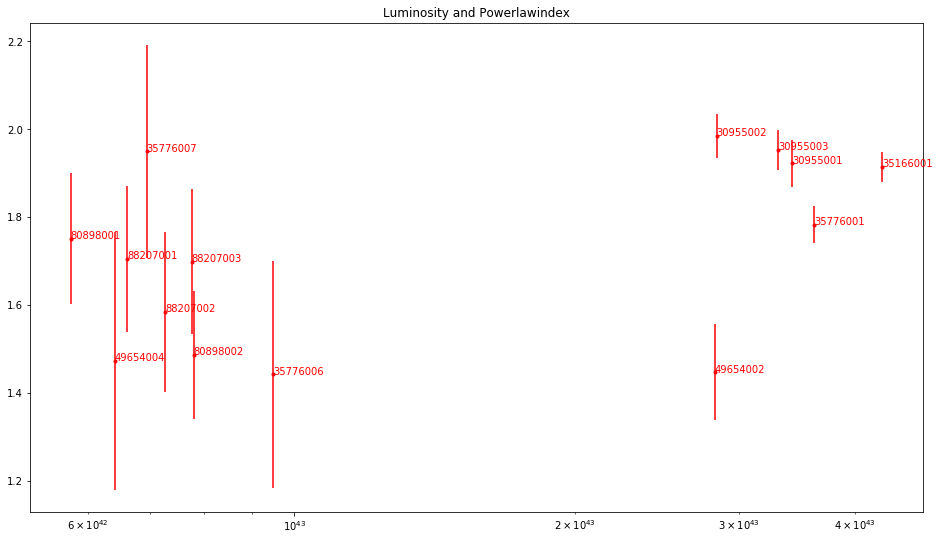

In [622]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
x=fitmore85[:,4]
y=fitmore85[:,0]
z=fitmore85[:,7]
fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
plt.errorbar(luminositymore85,fitmore85[:,0],yerr=fitmore85[:,1],fmt='.r')
plt.title("Luminosity and Powerlawindex")
for i,(_x,_y) in enumerate(zip(luminositymore85,y)):
    plt.text(_x,_y,int(z[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')
plt.xscale('log')
plt.show()

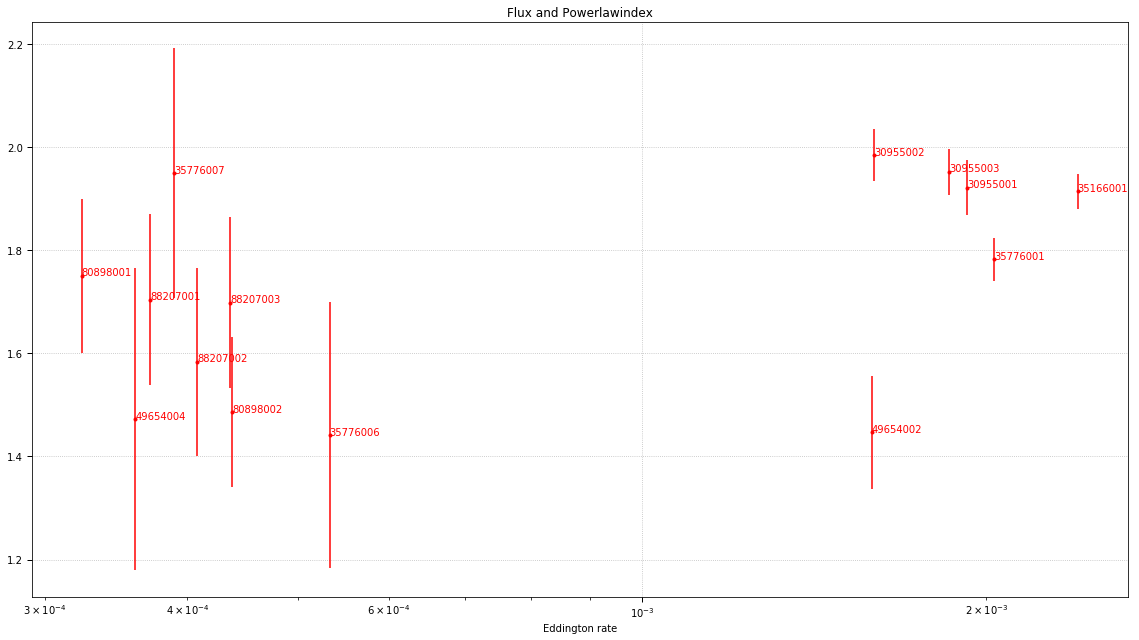

In [621]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

fig=plt.figure(figsize=(16,9))
ax=plt.subplot(111)
setup(ax)
plt.errorbar(eddrate,fitmore85[:,0],yerr=fitmore85[:,1],fmt='.r')
plt.title("Flux and Powerlawindex")
for i,(_x,_y) in enumerate(zip(eddrate,y)):
    plt.text(_x,_y,int(z[i]),color='red',fontsize=10)
#plt.figtext(0,0,'Fig words',color='green',ha='center')
plt.xscale('log')
plt.grid(alpha=0.9,linestyle=':',)
plt.xlabel('Eddington rate')
plt.tight_layout()
plt.show()

# Husemann data

In [56]:
head=['date','ins','expt','offaxisangle','Nbin','chi','gamma','','gerr','flux','','ferr']
Husemann2016=pd.read_csv('%sHusemann.txt'%filepath,sep=' ',header=None)

FileNotFoundError: [Errno 2] File b'/Volumes/Brettlv_G_m/Mrk1018/swift/Husemann.txt' does not exist: b'/Volumes/Brettlv_G_m/Mrk1018/swift/Husemann.txt'

In [48]:
Husemann2016.columns=head

In [59]:
Husemann2016.to_csv("husemann2016.csv" , encoding = "utf-8")

In [60]:
Husemann2016

,date,ins,expt,offaxisangle,Nbin,chi,gamma,,gerr,flux,,ferr
0,53587,(S),5.2,2.6,113,(1.1),1.93,±,0.05,1.11,±,0.08
1,54271,(S),3.3,4.4,58,(1.1),1.91,±,0.08,0.92,±,0.10
2,54273,(S),3.5,6.3,61,(1.2),1.95,±,0.08,0.78,±,0.07
3,54275,(S),4.1,5.9,73,(1.0),1.95,±,0.07,0.85,±,0.07
4,54628,(S),4.8,1.2,81,(1.0),1.76,±,0.06,0.97,±,0.08
5,55527,(C),22.7,0.0,169,(1.2),1.68,±,0.04,0.92,±,0.02
6,56450,(S),1.3,2.0,14,(1.1),1.42,±,0.18,0.79,±,0.16
7,56817,(S),2.1,4.5,3,(0.5),1.50,±,0.60,0.16,±,0.09
8,57429,(S),3.7,3.7,9,(1.3),1.75,±,0.27,0.15,±,0.05
9,57434,(S),3.1,3.9,8,(0.5),1.33,±,0.26,0.25,±,0.08


<ErrorbarContainer object of 3 artists>

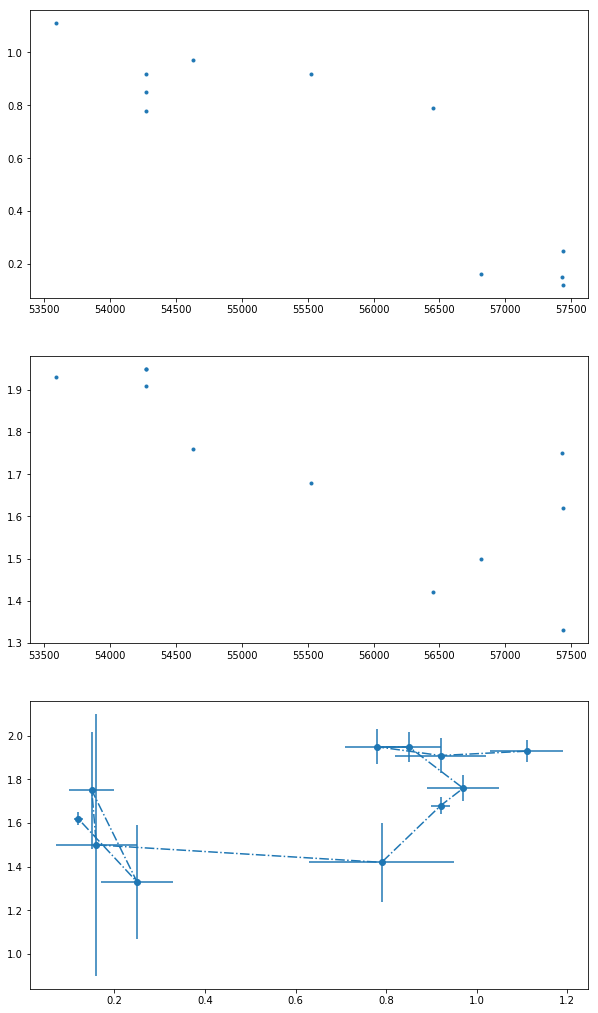

In [587]:
fig=plt.figure(figsize=(10,18))
ax=plt.subplot(311)
plt.plot(Husemann2016['date'],Husemann2016['flux'],'.')
ax=plt.subplot(312)
plt.plot(Husemann2016['date'],Husemann2016['gamma'],'.')
ax=plt.subplot(313)
plt.errorbar(Husemann2016['flux'],Husemann2016['gamma'],xerr=Husemann2016['ferr'],yerr=Husemann2016['gerr'],fmt='-.o')

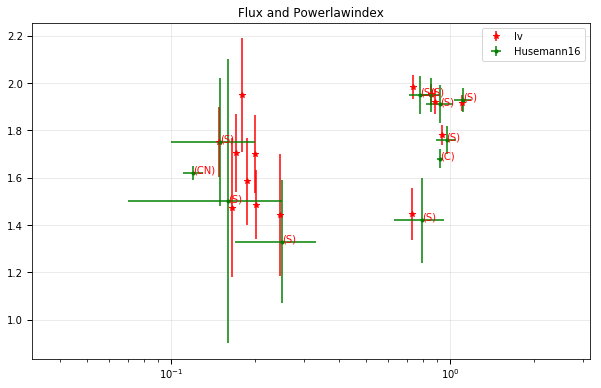

In [618]:
fig=plt.figure(figsize=(10,6.18))
ax=plt.subplot(111)
plt.errorbar(fitmore85[:,4]*10**11,fitmore85[:,0],yerr=fitmore85[:,1],fmt='*r',label='lv')
plt.errorbar(Husemann2016['flux'],Husemann2016['gamma'],xerr=Husemann2016['ferr'],yerr=Husemann2016['gerr'],fmt='.g',label='Husemann16')

for i,(_x,_y) in enumerate(zip(Husemann2016['flux'],Husemann2016['gamma'])):
    plt.text(_x,_y,Husemann2016['ins'][i],color='red',fontsize=10)

setup(ax)
ax.set_xlim(10**-1.5, 10**0.5)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
plt.title("Flux and Powerlawindex")
plt.grid(alpha=0.3)
plt.legend()
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.show()

In [46]:
Husemann2016

NameError: name 'Husemann2016' is not defined